Загрузка набора данных.

In [1]:
import numpy as np
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_linear_regression.csv")

y = df['price'].to_numpy().reshape(-1, 1)
X = df['km'].to_numpy().reshape(-1, 1)

# normalization
min_x = np.min(X)
max_x = np.max(X)
X = (X - min_x) / (max_x - min_x)

min_y = np.min(y)
max_y = np.max(y)
y = (y - min_y) / (max_y - min_y)

Распределение данных.

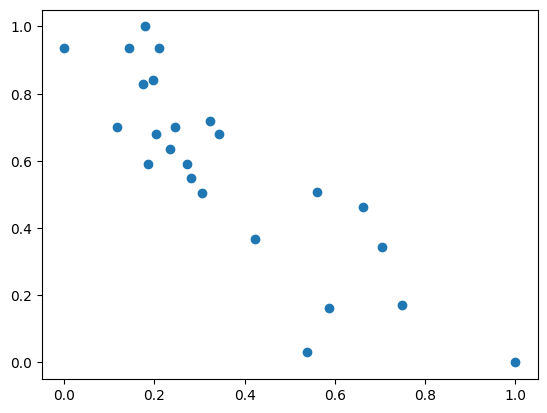

In [2]:
plt.scatter(X, y)

Запуск модели.

In [3]:
def predictions(X):
    df_w = pd.read_csv("weights_linear_regression.csv")
    w = df_w['weights'].to_numpy().reshape(-1, 1)
    return w[0] + X.T * w[1:]

pred_n = predictions(X).T
print(pred_n.T)

[[-0.06182463  0.39955482  0.35028576  0.18898713  0.23286883  0.51466945
   0.27523101  0.63346776  0.37791327  0.65649068  0.66556632  0.7529107
   0.70253654  0.59432878  0.73476863  0.69321225  0.82117368  0.61504941
   0.76263098  0.74087431  0.79462824  0.72786176  0.93783545  0.75876313]]


Градиентный спуск для линейной регрессии, обучение модели.

In [4]:
def regression_numeric(X, y, lr, e):
    k = 0
    X_a = np.hstack([np.ones((X.shape[0], 1)), X])
    w = np.zeros((X_a.shape[1], 1))
    while np.linalg.norm(grad := 2*X_a.T @ (X_a @ w - y)) > e:
        w -= lr * grad
        k += 1
    
    df_w = pd.DataFrame(w, columns=['weights'])
    df_w.to_csv('weights_linear_regression.csv', index=False)
    print(k)

e=0.01
lr=0.01

regression_numeric(X, y, lr, e)

237


Оценка качества модели (средняя квадратическая ошибка, средняя абсолютная ошибка).

In [5]:
pred_n = predictions(X)

pred_n = pred_n * (max_y - min_y) + min_y

def mae(x, y):
    return np.mean(np.abs(x - y))

def mse(x, y):
    return np.sqrt(np.mean(np.square(x - y)))

print("Mean absolute error: ", end='')
print(mae(y, pred_n))
print("Mean squared error: ", end='')
print(mse(y,pred_n))

Mean absolute error: 6330.913645083292
Mean squared error: 6426.057929198229


Визуализация обучающих данных и предсказания модели.

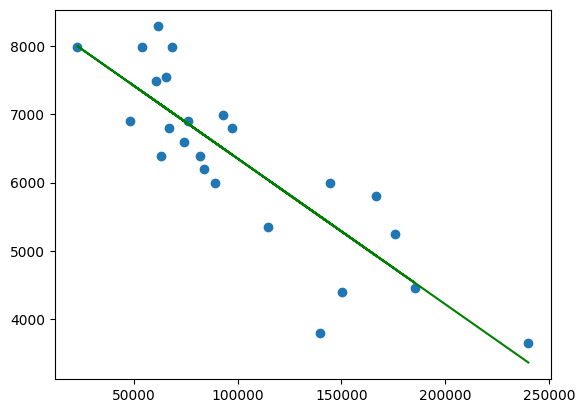

In [6]:
X = X * (max_x - min_x) + min_x
y = y * (max_y - min_y) + min_y

plt.scatter(X, y)
plt.plot(X, pred_n.T, 'g')

Введите свое значение признака, чтобы получить ответ - стоимость автомобиля.

In [7]:
km = 54000 # - прокат автомобиля

In [8]:
# normalization
X = np.array(km).reshape(-1,1)
X = (X - min_x) / (max_x - min_x)

pred_n = predictions(X)
pred_n = pred_n * (max_y - min_y) + min_y
print('Прокат автомобиля: ' + str(km) + ' км')
print('Стоимость автомобиля: ' + str(np.round(pred_n[0][0])) + ' у.е.')

Прокат автомобиля: 54000 км
Стоимость автомобиля: 7337.0 у.е.
